# Exercise 2.3 | Task

##### 1. Importing Libraries
##### 2. Line Plot | 2022 Temperatures
##### 3. Create 'trips per day' column, and merge it with the weather dataframe
##### 4. Line Chart | Bike trip counts
##### 5. Dual Axis Plot

##### 1. Importing Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [3]:
df = pd.read_csv('newyork_data.csv', index_col = 0)

C:\Users\repla\AppData\Local\Temp\ipykernel_18648\3816047514.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('newyork_data.csv', index_col = 0)


In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.shape

(30716683, 16)

In [6]:
#Going to take a smaller sample of our dataset so we can run smoother

In [7]:
# Replace 0.025 with the fraction of data you want to sample, for example, 0.1 for 10%
sample_fraction = 0.025

# Take a random sample of your DataFrame
sample_df = df.sample(frac=sample_fraction, random_state=42)

# Check the shape of the sampled DataFrame
print(sample_df.shape)

(767917, 16)


In [9]:
sample_df.drop(columns = {'_merge'}, inplace = True)

In [10]:
sample_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
27288627,C9690629E2113758,classic_bike,2022-02-28 08:10:28,2022-02-28 08:16:23,Dean St & Franklin Ave,4107.13,Carroll St & Franklin Ave,3847.04,40.677592,-73.955637,40.667941,-73.958800,member,2022-02-28,0.8
7815877,A7EB955BF7BC4EEC,classic_bike,2022-07-01 16:23:07,2022-07-01 16:55:52,5 Ave & E 72 St,7100.07,Central Park West & W 68 St,7079.06,40.772828,-73.966853,40.773407,-73.977825,member,2022-07-01,28.1
17402654,62F66D00521C13CB,classic_bike,2022-08-09 20:02:33,2022-08-09 20:14:13,Manhattan Av & Leonard St,5442.09,Wythe Ave & Metropolitan Ave,5348.02,40.720840,-73.948440,40.716887,-73.963198,member,2022-08-09,31.3
20829136,F960DFB886B78057,classic_bike,2022-06-05 18:51:58,2022-06-05 19:16:18,Putnam Ave & Throop Ave,4392.04,Bedford Ave & Nassau Ave,5550.05,40.685153,-73.941110,40.723117,-73.952123,casual,2022-06-05,20.0
14229657,DBC236D152A24B65,classic_bike,2022-09-17 23:03:46,2022-09-17 23:23:54,Sterling Pl & Bedford Ave,3993.03,Halsey St & Broadway,4366.01,40.672695,-73.954131,40.685650,-73.915640,member,2022-09-17,20.8


In [11]:
sample_df.shape

(767917, 15)

In [12]:
df = sample_df

In [13]:
df.shape

(767917, 15)

In [14]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

##### 2. Line Plot | 2022 Temperatures

In [17]:
df_temp = df.set_index('date')

In [18]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-02-28,C9690629E2113758,classic_bike,2022-02-28 08:10:28,2022-02-28 08:16:23,Dean St & Franklin Ave,4107.13,Carroll St & Franklin Ave,3847.04,40.677592,-73.955637,40.667941,-73.958800,member,0.8
2022-07-01,A7EB955BF7BC4EEC,classic_bike,2022-07-01 16:23:07,2022-07-01 16:55:52,5 Ave & E 72 St,7100.07,Central Park West & W 68 St,7079.06,40.772828,-73.966853,40.773407,-73.977825,member,28.1
2022-08-09,62F66D00521C13CB,classic_bike,2022-08-09 20:02:33,2022-08-09 20:14:13,Manhattan Av & Leonard St,5442.09,Wythe Ave & Metropolitan Ave,5348.02,40.720840,-73.948440,40.716887,-73.963198,member,31.3
2022-06-05,F960DFB886B78057,classic_bike,2022-06-05 18:51:58,2022-06-05 19:16:18,Putnam Ave & Throop Ave,4392.04,Bedford Ave & Nassau Ave,5550.05,40.685153,-73.941110,40.723117,-73.952123,casual,20.0
2022-09-17,DBC236D152A24B65,classic_bike,2022-09-17 23:03:46,2022-09-17 23:23:54,Sterling Pl & Bedford Ave,3993.03,Halsey St & Broadway,4366.01,40.672695,-73.954131,40.685650,-73.915640,member,20.8


<Axes: xlabel='date'>

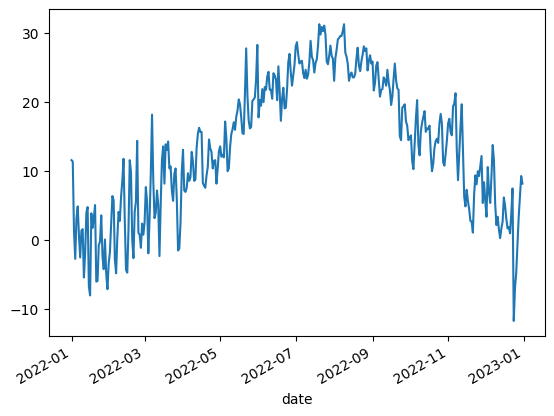

In [19]:
df_temp['avgTemp'].plot()

##### 3. Create 'trips per day' column, and merge it with the weather dataframe

In [20]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [21]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [22]:
df_group.head()

,date,ride_id
0,2022-01-01,485
1,2022-01-02,1156
2,2022-01-03,894
3,2022-01-04,975
4,2022-01-05,915


In [23]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          767917
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (0, 17)
Shape of January 2nd is (0, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [24]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-02-28,C9690629E2113758,classic_bike,2022-02-28 08:10:28,2022-02-28 08:16:23,Dean St & Franklin Ave,4107.13,Carroll St & Franklin Ave,3847.04,40.677592,-73.955637,40.667941,-73.958800,member,0.8,1116,both
2022-02-28,B0C13CE9BAE7C1A5,electric_bike,2022-02-28 12:31:41,2022-02-28 12:32:53,Market St & Henry St,5270.09,Market St & Henry St,5270.09,40.713107,-73.994464,40.713107,-73.994464,member,0.8,1116,both
2022-02-28,6D996A7E7E23A138,classic_bike,2022-02-28 16:52:54,2022-02-28 17:17:06,Fulton St & William St,5137.11,8 Ave & W 31 St,6450.05,40.709601,-74.006551,40.750585,-73.994685,member,0.8,1116,both
2022-02-28,394DE1BC9D4644AA,classic_bike,2022-02-28 07:15:03,2022-02-28 07:48:55,Hicks St & Montague St,4645.09,E 51 St & 1 Ave,6532.06,40.695128,-73.995951,40.754557,-73.965930,member,0.8,1116,both
2022-02-28,2DAA07E38B56E16F,classic_bike,2022-02-28 15:04:31,2022-02-28 15:09:39,W 12 St & Hudson St,5997.1,7 Ave S & Bleecker St,5805.07,40.737530,-74.005589,40.732139,-74.003638,casual,0.8,1116,both


##### 4. Line Chart | Bike trip counts

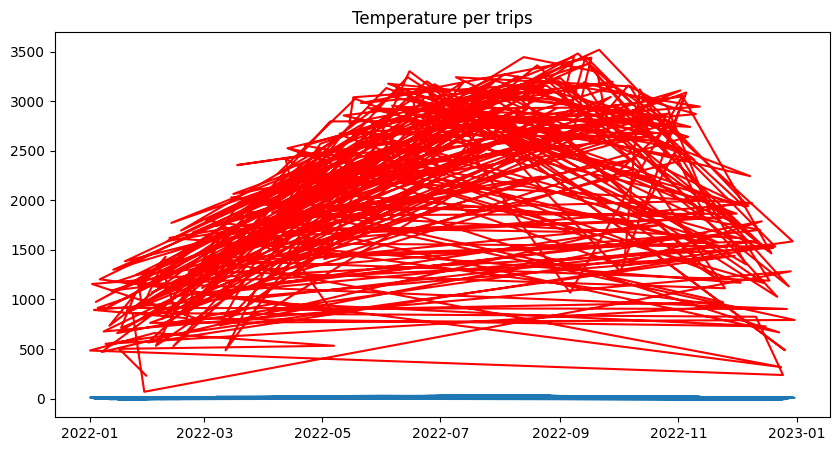

In [25]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'red')
plt.show()

In [37]:
# Approach:
# The plot shows the relationship between average temperature and daily bike rides,
# allowing us to observe any potential correlations between weather and biking activity.

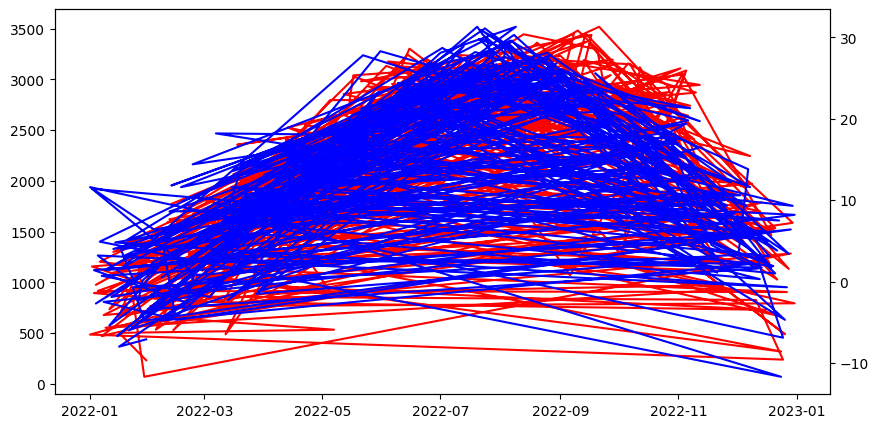

In [28]:
# Dual Plot Chart

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "blue")
plt.show()

In [39]:
# Approach:
# This dual plot chart compares the daily bike rides (red line) with the average temperature (blue line)
# over time, providing insights into potential correlations between weather conditions and biking activity.

##### 5. Dual Axis Plot

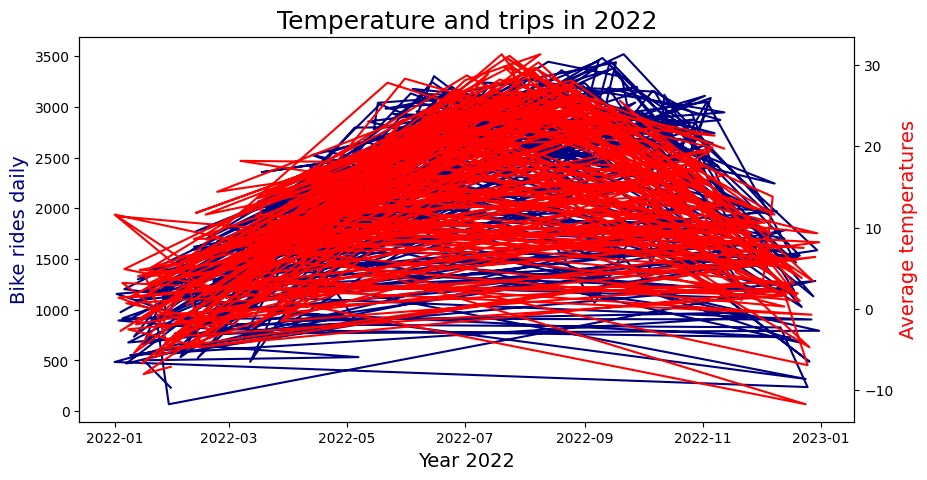

In [29]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [40]:
# Approach:
# This visualization juxtaposes the daily count of bike rides (in navy) with the average temperatures
# (in red) throughout the year 2022. It offers insights into potential relationships between
# temperature variations and biking activity over time.

In [30]:
plt.style.use('ggplot')

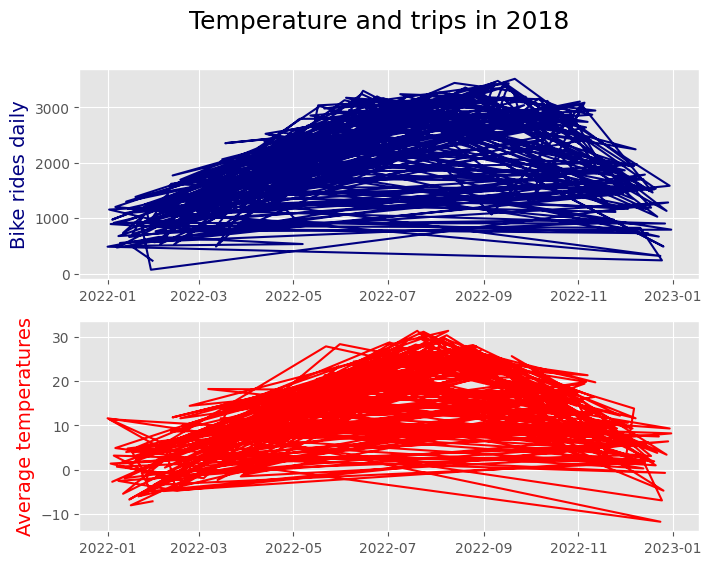

In [31]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2018', fontsize = 18)

plt.show()

In [41]:
# Takeaway:
# This visualization depicts the daily count of bike rides (in navy) and the average temperatures
# (in red) for the year 2018. It offers insights into potential correlations between temperature
# fluctuations and biking activity over time.

##### Recap

In [34]:
# This code segment utilizes Matplotlib's object-oriented approach to create a visualization. 
# It begins by creating a figure and axis objects using plt.subplots(), assigning them to variables fig and ax. 
# The bike rides data is plotted on the primary y-axis using ax.plot(), with appropriate axis labels set. 
# A twin axis, ax2, is then initialized using ax.twinx() to enable plotting of average temperatures on a secondary y-axis. 
# Styling details such as colors and font sizes are configured, and the plot is displayed using plt.show(). 
# This paradigm offers enhanced control over plot customization compared to the pyplot interface.

In [32]:
# save the plot as a file
fig.savefig('nyc_trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [33]:
df_temp.to_csv('newyork_data_sample.csv')